In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filename = "NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root"
tree = Tree(filename)
preselection = Selection(tree,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(tree,mask=sixb_in_preselection,include=preselection,tag="baseline")
tree.calc_jet_dr(baseline.jets_selected)
print(baseline)

--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
Passed Jet MR:      0.40
Passed Jet Eff:     0.95
--- all baseline ---
Event Efficiency:   0.29
Selected Purity(6): 1.00
Passed Jet S/T:     0.79
Passed Jet MR:      0.33
Passed Jet Eff:     1.00


# Six Jet Selection

In [14]:
ordered = 

In [15]:
merged_ordering = fourth_nbtag.merge("btag ordered")

--- all btag ordered ---
Event Efficiency:   1.0
Selected Purity(6): 1.00
Passed Jet S/T:     0.79
Passed Jet MR:      0.33
Passed Jet Eff:     1.00
6    & 7    & 8    & 9    & 10   & 11   & 12   & 13   & 14   & 15   & 16  
0.67 & 0.89 & 0.96 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00


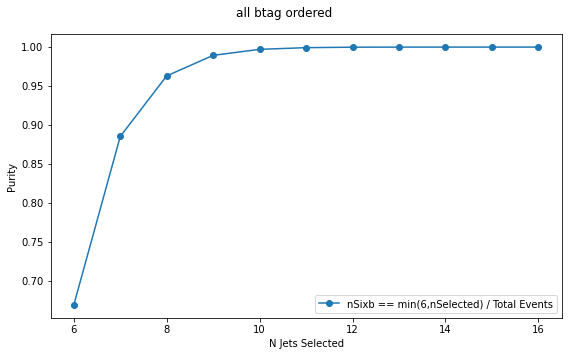

In [16]:
selection_study(merged_ordering,latex=1)

# Plots

In [10]:
def plot_selection(remaining,signaljet):
    jets_ordered_study(remaining,njets=1,topbkg=1)
    jets_2d_ordered_study(remaining,njets=1,topbkg=1,log=1,print_score=0)

    jets_study(signaljet)
    jets_2d_study(signaljet,log=1,print_score=0)

--- all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 1.00
Passed Jet S/T:     0.79
Passed Jet MR:      0.33
Passed Jet Eff:     1.00


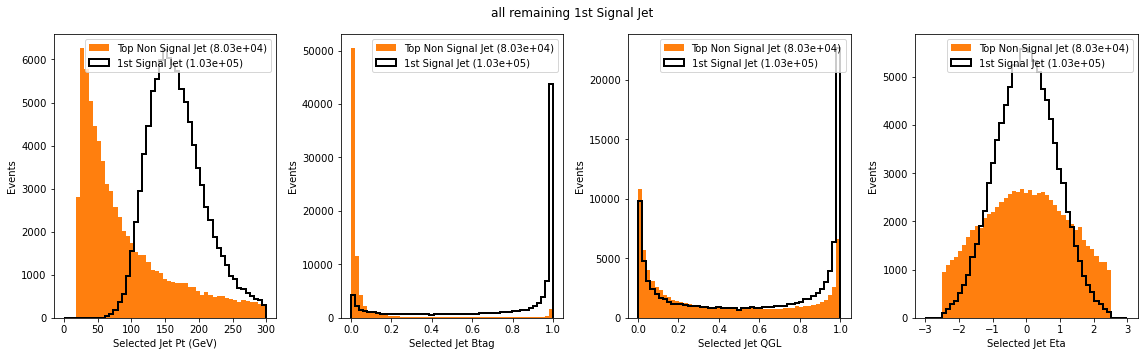

--- all remaining ---


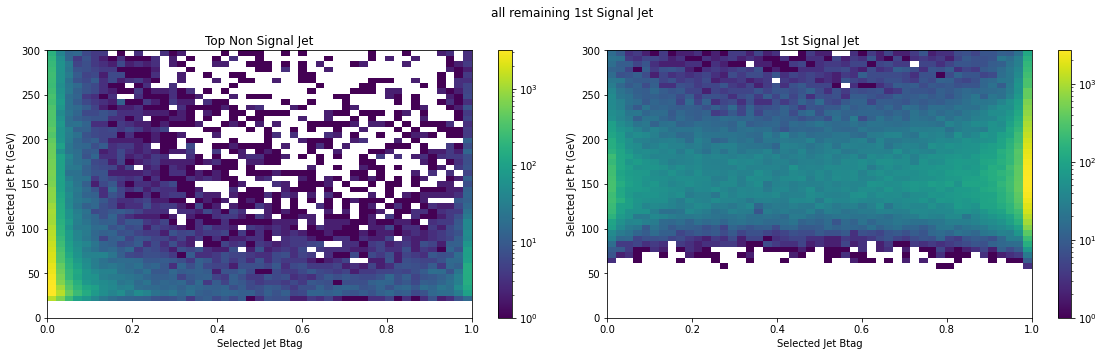

--- 1 T60 ---
Event Efficiency:   0.98
Selected Purity(1): 0.99
Passed Jet S/T:     0.99
Passed Jet MR:      0.01
Passed Jet Eff:     0.47


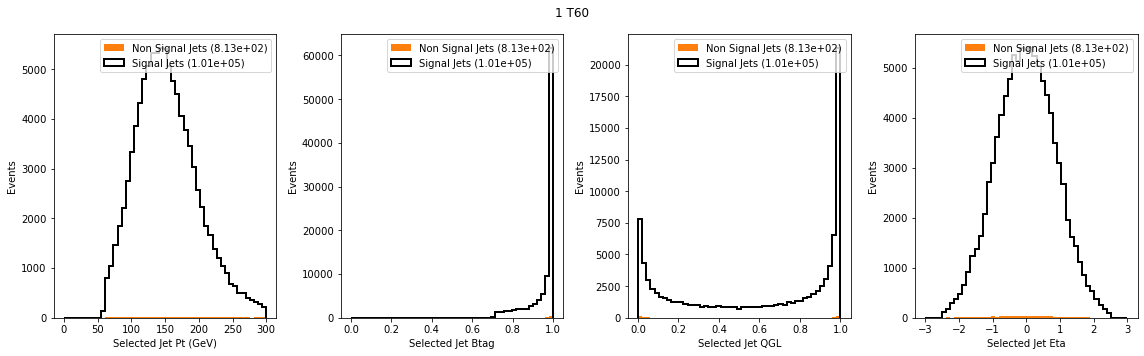

--- 1 T60 ---


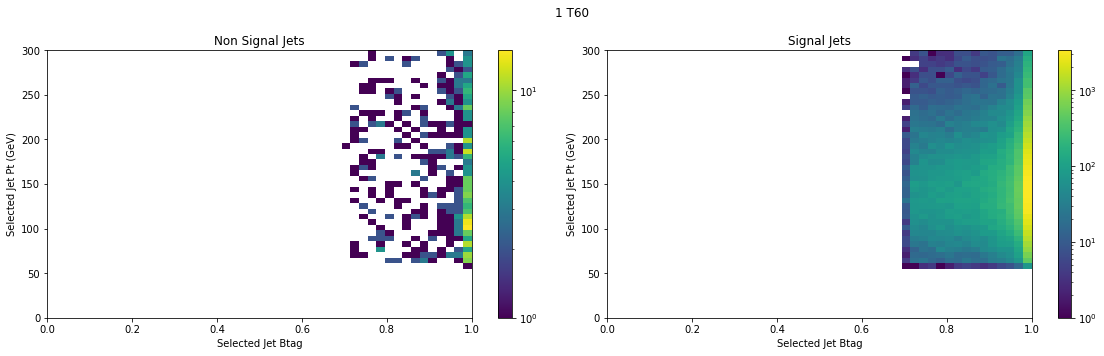

In [11]:
plot_selection(first_remaining,first_signaljet)

--- 1 T60 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.01
Passed Jet S/T:     0.76
Passed Jet MR:      0.33
Passed Jet Eff:     0.83


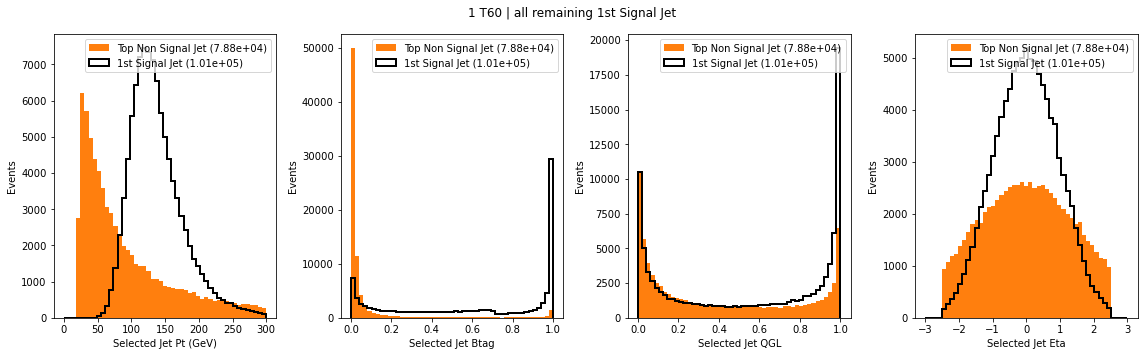

--- 1 T60 | all remaining ---


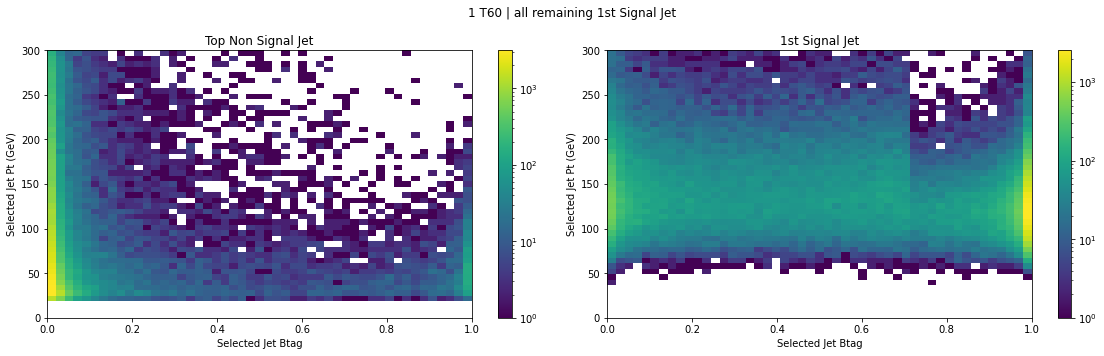

--- 1 T60 | 1 T40 ---
Event Efficiency:   0.96
Selected Purity(1): 0.99
Passed Jet S/T:     0.99
Passed Jet MR:      0.01
Passed Jet Eff:     0.43


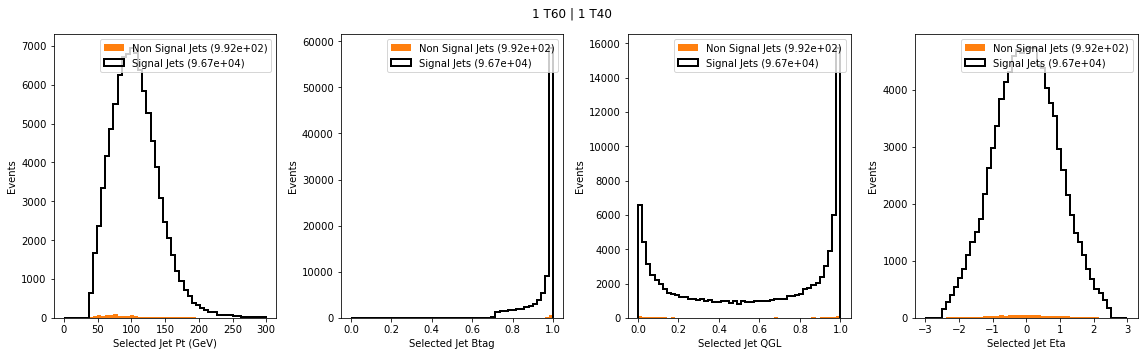

--- 1 T60 | 1 T40 ---


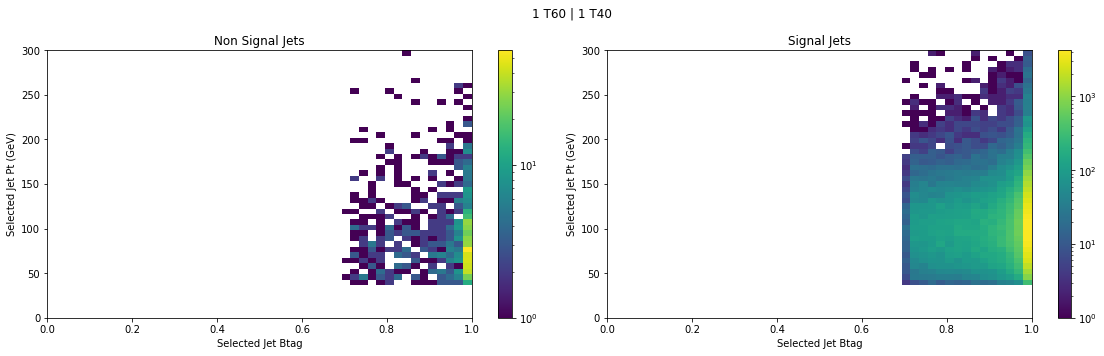

In [12]:
plot_selection(second_remaining,second_signaljet)

--- 1 T60 | 1 T40 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.72
Passed Jet MR:      0.32
Passed Jet Eff:     0.67


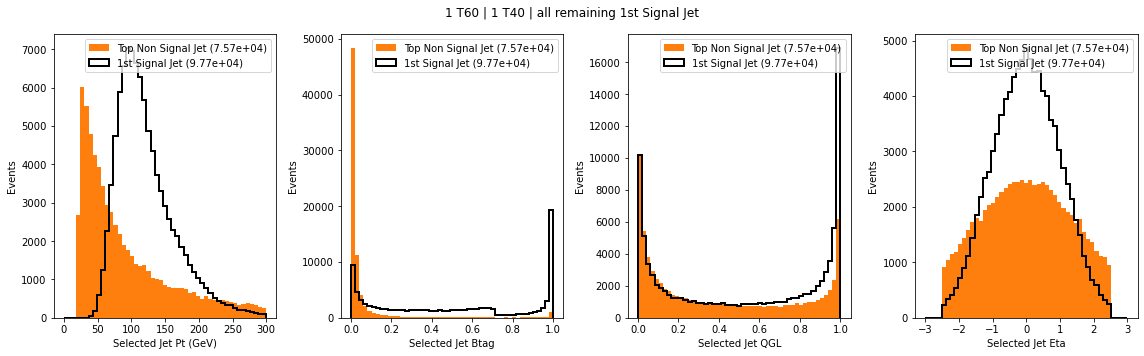

--- 1 T60 | 1 T40 | all remaining ---


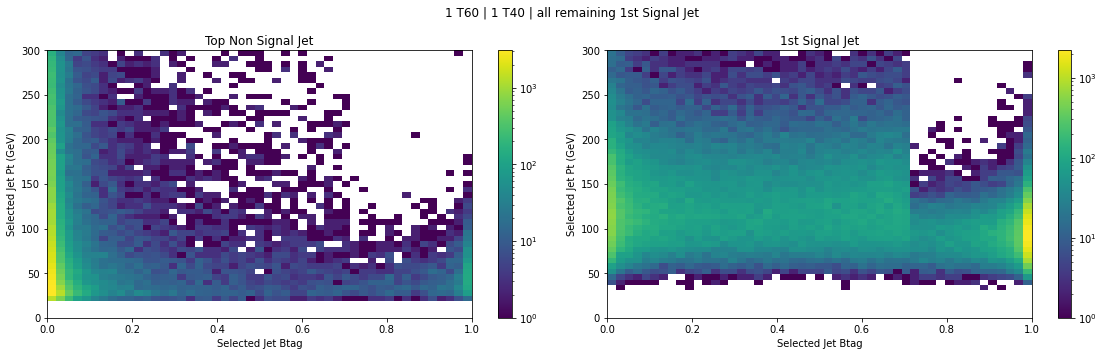

--- 1 T60 | 1 T40 | 1 M40 ---
Event Efficiency:   0.97
Selected Purity(1): 0.98
Passed Jet S/T:     0.98
Passed Jet MR:      0.01
Passed Jet Eff:     0.41


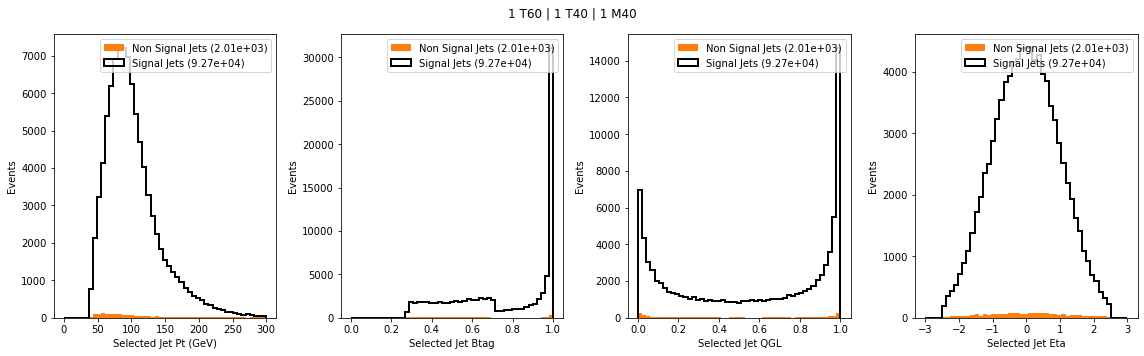

--- 1 T60 | 1 T40 | 1 M40 ---


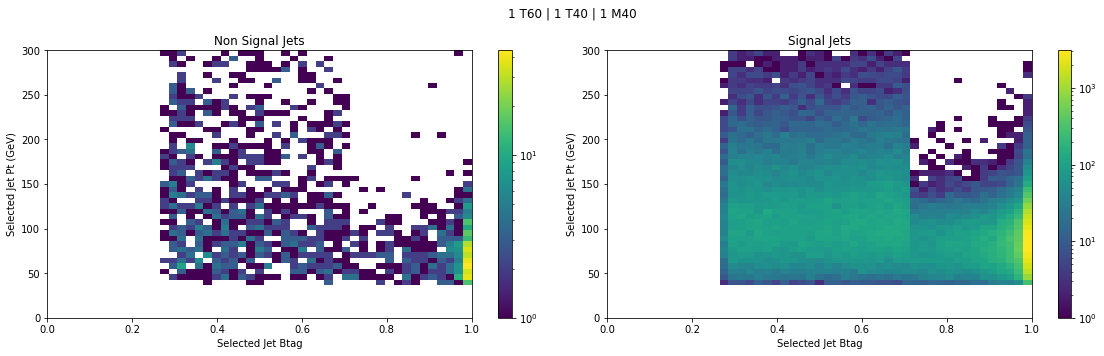

In [13]:
plot_selection(third_remaining,third_signaljet)

--- 1 T60 | 1 T40 | 1 M40 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.67
Passed Jet MR:      0.32
Passed Jet Eff:     0.51


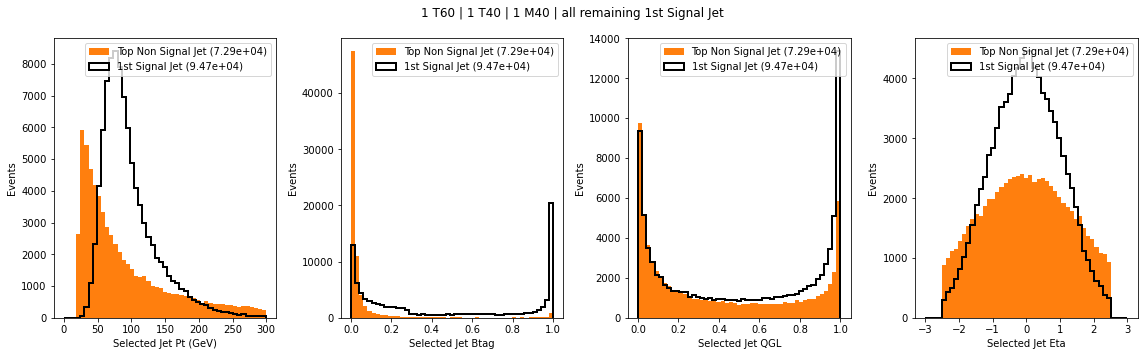

--- 1 T60 | 1 T40 | 1 M40 | all remaining ---


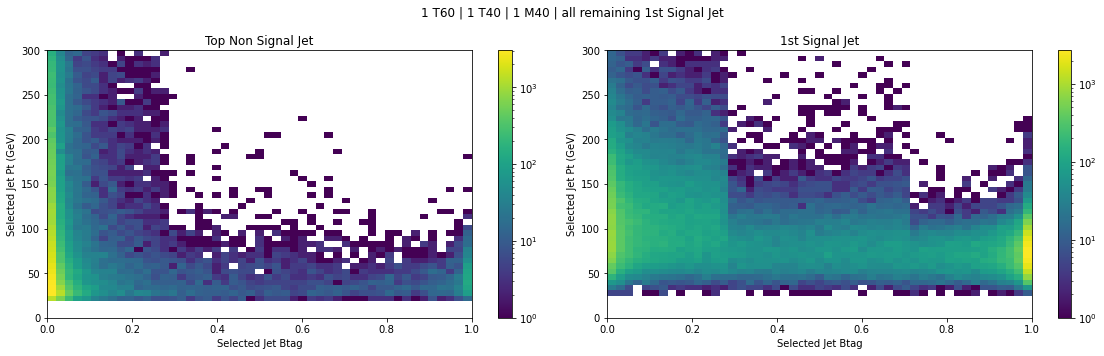

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 ---
Event Efficiency:   0.96
Selected Purity(1): 0.98
Passed Jet S/T:     0.96
Passed Jet MR:      0.02
Passed Jet Eff:     0.34


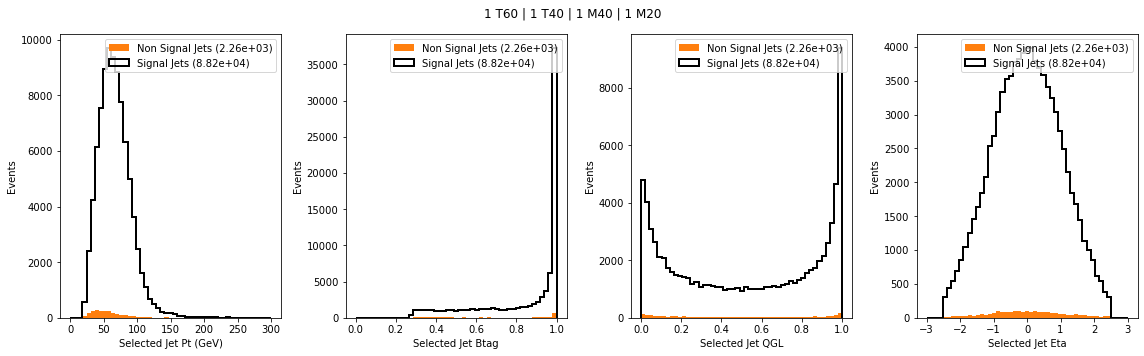

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 ---


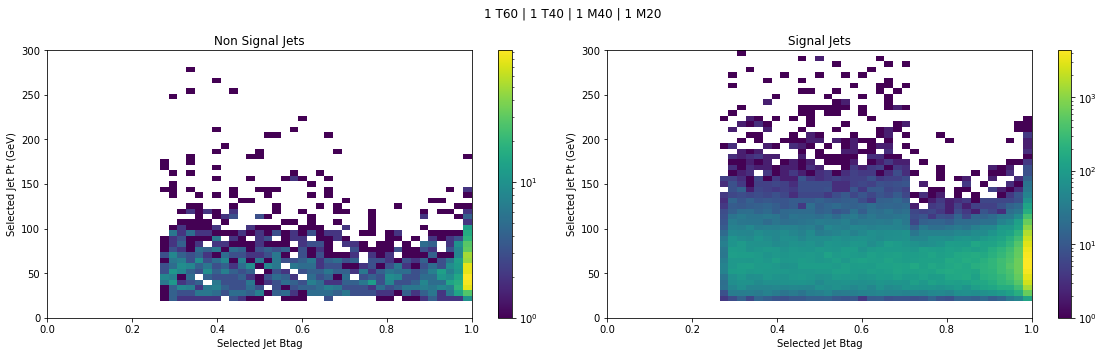

In [14]:
plot_selection(fourth_remaining,fourth_signaljet)

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.58
Passed Jet MR:      0.32
Passed Jet Eff:     0.34


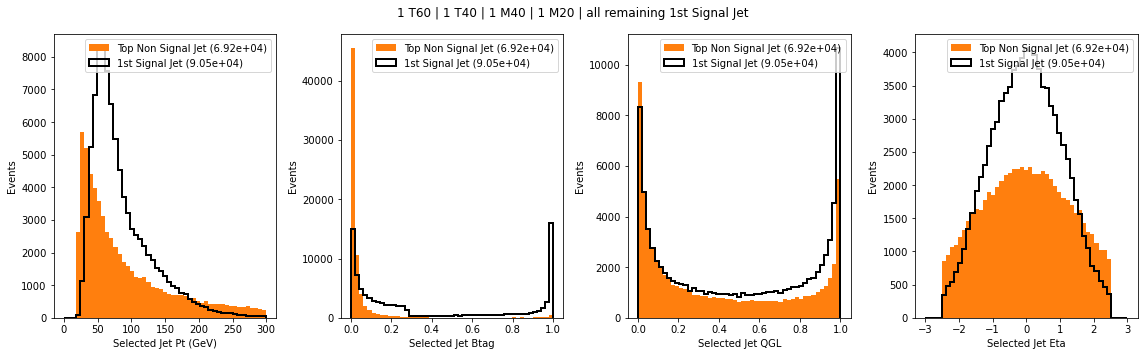

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | all remaining ---


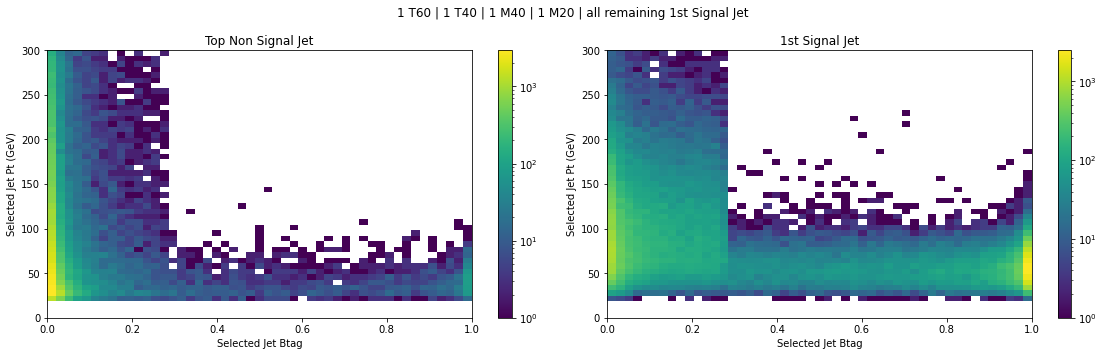

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 ---
Event Efficiency:   0.97
Selected Purity(1): 0.90
Passed Jet S/T:     0.86
Passed Jet MR:      0.06
Passed Jet Eff:     0.28


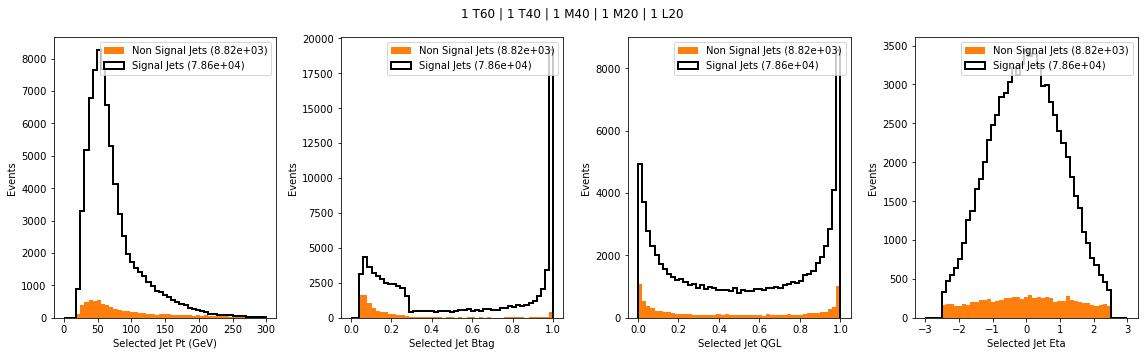

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 ---


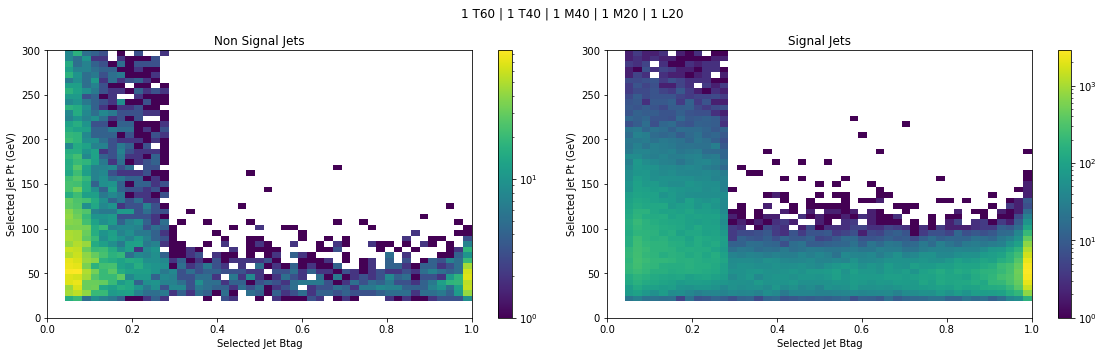

In [15]:
plot_selection(fifth_remaining,fifth_signaljet)

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.45
Passed Jet MR:      0.30
Passed Jet Eff:     0.19


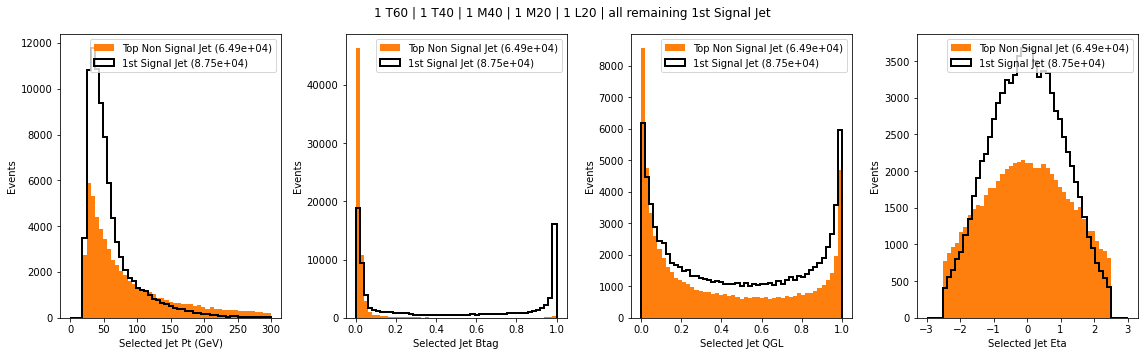

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | all remaining ---


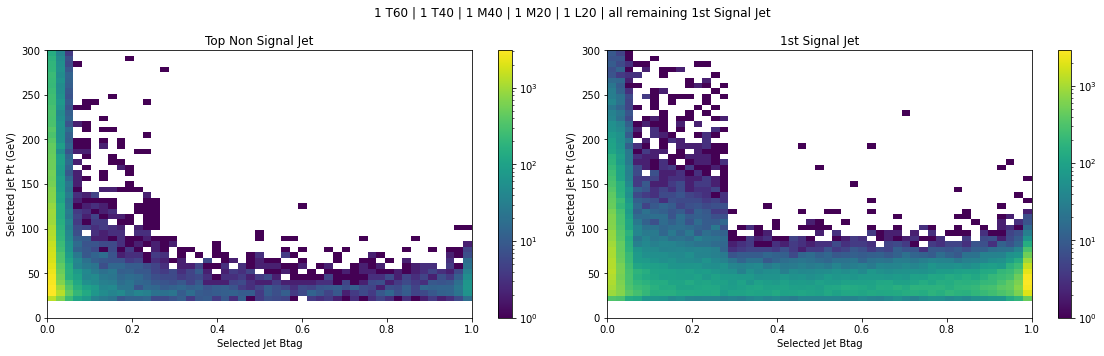

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | 1 L20 ---
Event Efficiency:   0.75
Selected Purity(1): 0.88
Passed Jet S/T:     0.82
Passed Jet MR:      0.05
Passed Jet Eff:     0.17


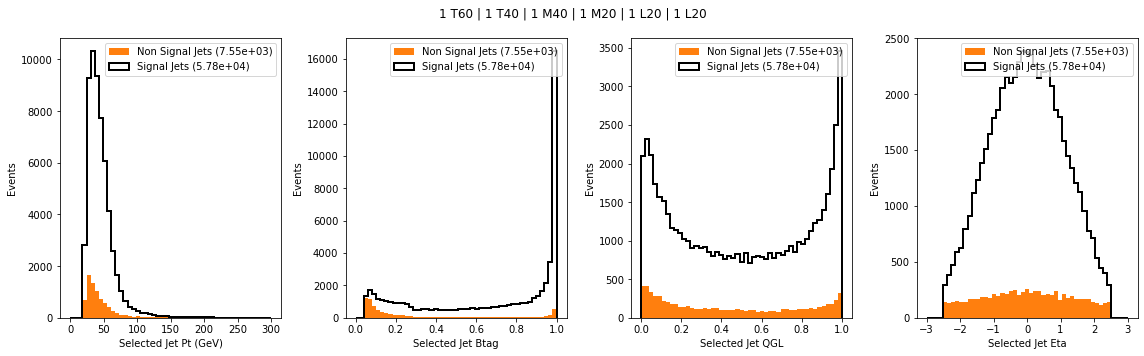

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | 1 L20 ---


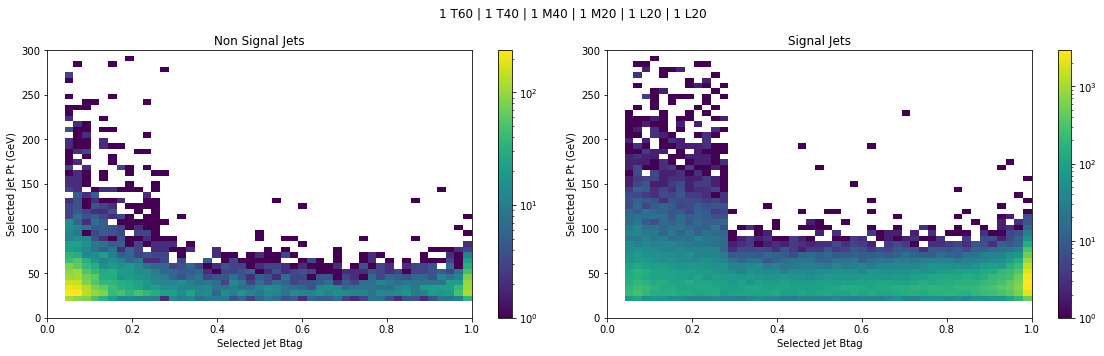

In [16]:
plot_selection(sixth_remaining,sixth_signaljet)